### Import the Packages

In [7]:
import pandas as pd
import numpy as np

#### Importing the Data

In [8]:
raw_csv_data=pd.read_csv("index2018.csv")

In [10]:
df_comp=raw_csv_data.copy()

The purpose of copy is to have a backup in case we delete or alter some values by mistakes

#### Examing the Data

In [11]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


We usually use date as indexes because we analyze time series in a chrological order.

In [12]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


Here, date is not in the summary be describe() method because date is not numeric.
Notice that they have different values and scales.

In [15]:
df_comp.spx.isna().sum()

0

Because like many languages, True=1, False=0, we can use sum() to count number of missing values. 
We can specify specific series to check by df.name_of_the_series

We can take a look at summary statistics to have a general idea about how spread each series is. But it is not clear how the data evolves.
Thus, we usually plot data sets to see how they evolves over time.

#### Plotting the Data

In [16]:
import matplotlib.pyplot as plt

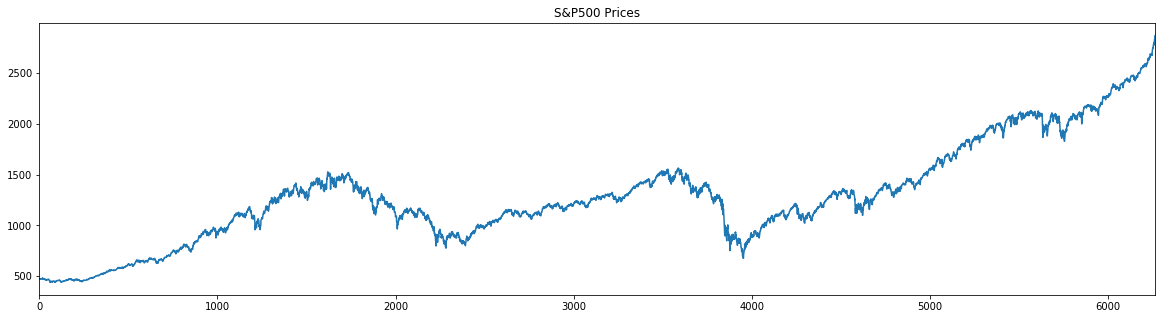

In [20]:
df_comp.spx.plot(figsize=(20,5),title="S&P500 Prices")
plt.show()

In proper time-series plot, the x-axis would show the corresponding dates for each period. The "0" here should be Januray 7th, 1994. We will amend this problem later.

Good practice:
1. To keep track which grpah represents which series, add title
2. stretch the graph by changing figsize

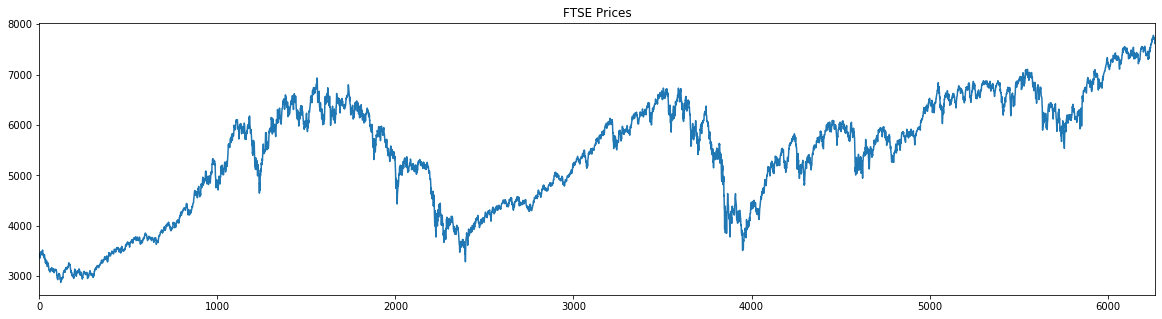

In [21]:
df_comp.ftse.plot(figsize=(20,5),title="FTSE Prices")
plt.show()

To compare these two series, we can put them into one garph by putting them into one cell. Don't forget to rename the title otherwise it will remain the title of last time.

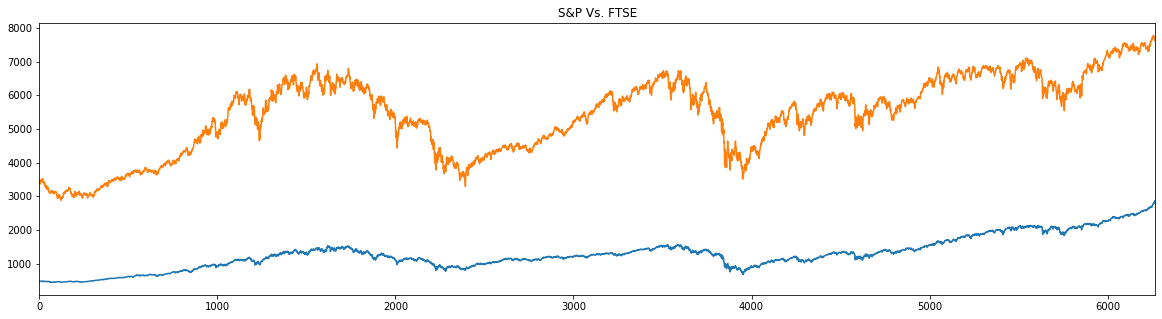

In [23]:
df_comp.spx.plot(figsize=(20,5),title="S&P500 Prices")
df_comp.ftse.plot(figsize=(20,5),title="FTSE Prices")
plt.title("S&P Vs. FTSE")
plt.show()

The graph here is misleading if you think the S&P moves more smoothly and more stable. This is because the S&P and FTSE have vastly different magnitudes.

#### The QQ plot (quantile-quantile plot)

It is used to determine whether a data set is distributed a certain way. It usually shows how the data fits a normal distribution.

In [24]:
import scipy.stats
import pylab

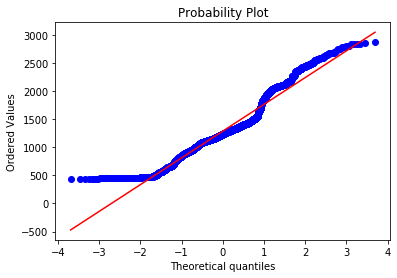

In [25]:
scipy.stats.probplot(df_comp.spx,plot=pylab)
pylab.show()

QQ plot takes all the values a variable can take, and arranges them in accending order. Y-axis is the price. X-axis is theoretical quantiles and the number represents how many stadard deviations away from the mean these values are. The red line shows what the data points should follow if they are normally distributed. But here we can see the data is not normally distributed which is expected for time series data. Methods for normal distribution does not work for time series.